<a href="https://colab.research.google.com/github/SrikantShubam/objectDetectionExtraction/blob/main/Part_1_Using_Contours.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Using contours for image detection and extraction 
## By Srikant Shubham

For extracting and detection we will be using the basic opencv commands in the following manner 



1.   Grayscaling the image
2.   Gaussian Blur

3.   [Otsu Thresholding](https://learnopencv.com/otsu-thresholding-with-opencv/)
4.   Dilation
5.   Contours 



Finally we will be calculating the different contours and will be only using those contours which are more than the mean.





Downloading the dataset

In [ ]:
!wget https://moderncomputervision.s3.eu-west-2.amazonaws.com/images.zip
!unzip -qq images.zip

--2022-07-25 09:43:49--  https://moderncomputervision.s3.eu-west-2.amazonaws.com/images.zip
Resolving moderncomputervision.s3.eu-west-2.amazonaws.com (moderncomputervision.s3.eu-west-2.amazonaws.com)... 52.95.149.198
Connecting to moderncomputervision.s3.eu-west-2.amazonaws.com (moderncomputervision.s3.eu-west-2.amazonaws.com)|52.95.149.198|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 29586716 (28M) [application/zip]
Saving to: ‘images.zip’

images.zip          100%[===================>]  28.22M  17.5MB/s    in 1.6s    

2022-07-25 09:43:52 (17.5 MB/s) - ‘images.zip’ saved [29586716/29586716]



#### What are contours?
Contours are defined as the line joining all the points along the boundary of an image that are having the same intensity. Contours come handy in shape analysis, finding the size of the object of interest, and object detection.

In this notebook we will be using Cannyedges to first find all the prominent contours after blurring and thresholding which will help to reduce unwanted or extra objects. After doing that we will be using *is_contour_bad()* which uses approxPolyDP to remove all those contours which are have less contours than a rectangle ie 4.

Then in the second step we will be masking all the objects detected after using is_contour_bad() function 

Finally printing those contours which are having values greater than the mean of the contours

![picture](https://drive.google.com/uc?export=view&id=1ZGfPGtyrQhFp5OjN5qNpdqw9LvMpCQVg)

Importing Libraries

In [ ]:
import os 
import cv2 
from matplotlib import pyplot as plt
import numpy as np
import imutils
# Define our imshow function 
def imshow(title = "Image", image = None, size = 10):
    w, h = image.shape[0], image.shape[1]
    aspect_ratio = w/h
    plt.figure(figsize=(size * aspect_ratio,size))
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.title(title)
    plt.show()


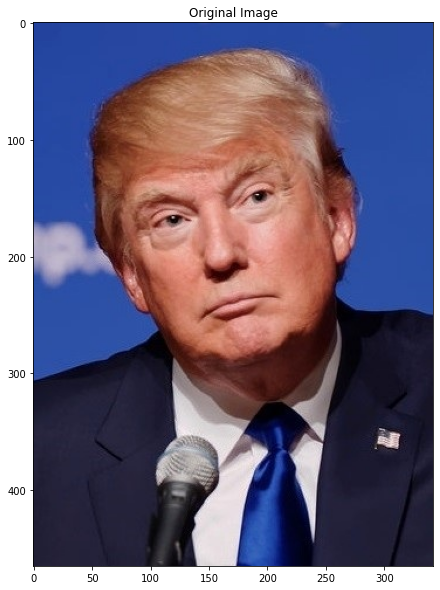

In [ ]:
image = cv2.imread('images/Trump.jpg')
imshow('Original Image', image)

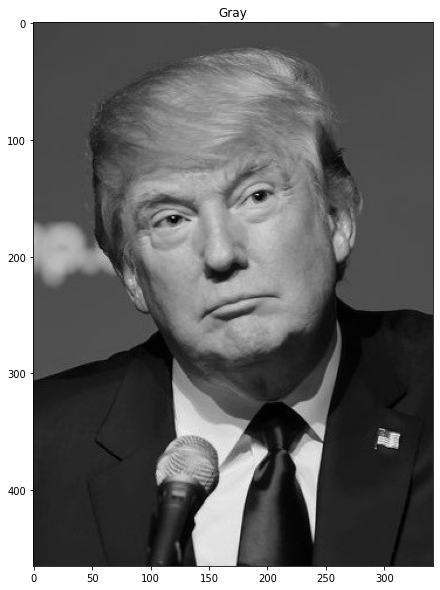

In [ ]:
#grayscaling
gray=cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
imshow("Gray",gray)

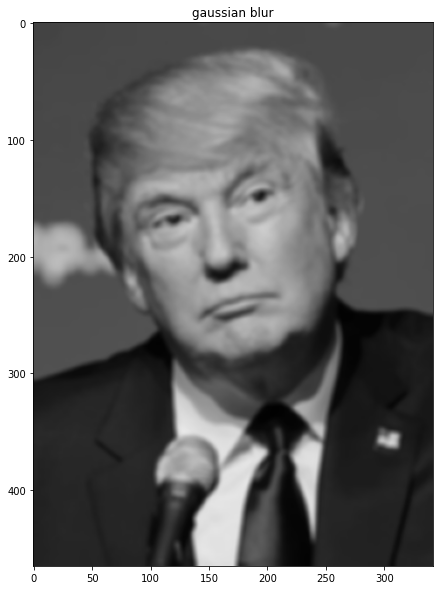

In [ ]:
#gaussian blur
gray=cv2.GaussianBlur(gray,(7,7),2)
imshow("gaussian blur",gray)

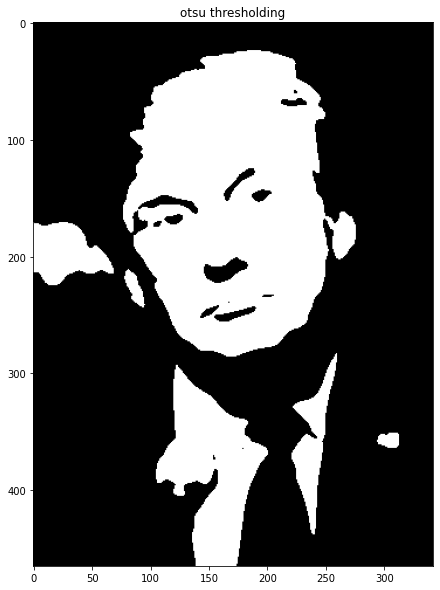

In [ ]:
#thresholding
ret,thresh=cv2.threshold(gray,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
imshow("otsu thresholding",thresh)

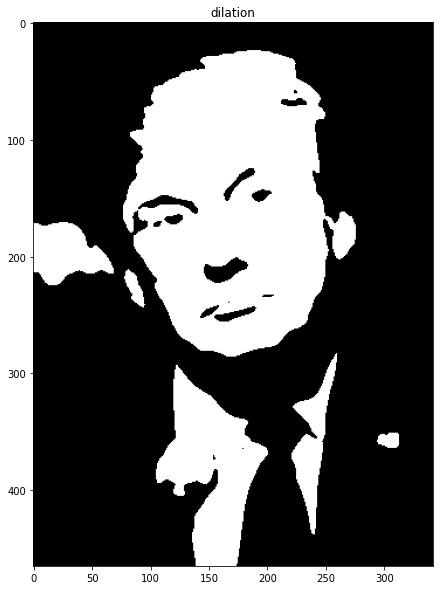

In [ ]:
#dilation
kernel=np.ones((1,1),np.uint8)
dilation=cv2.dilate(thresh,kernel,iterations=1)
imshow("dilation",dilation)

In [ ]:
#using the dilation to again find the contours
contours,hierarchy=cv2.findContours(dilation,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)

NameError: ignored

In [ ]:
def is_contour_bad(c):
	# approximate the contour
	peri = cv2.arcLength(c, True)
	approx = cv2.approxPolyDP(c, 0.02 * peri, True)
	# the contour is 'bad' if it is not a rectangle
	return not len(approx) == 4

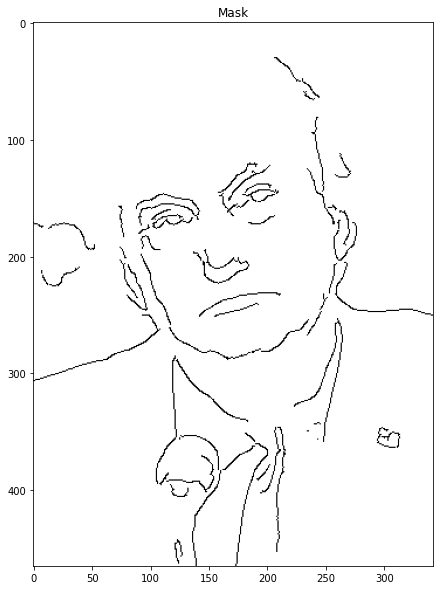

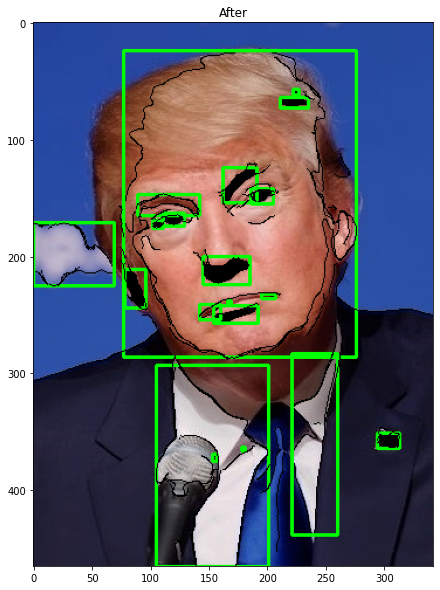

In [ ]:
#removing the bad contours from the image



edged = cv2.Canny(gray, 50, 100)

# find contours in the image and initialize the mask that will be
# used to remove the bad contours
cnts = cv2.findContours(edged.copy(), cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)
cnts = imutils.grab_contours(cnts)
mask = np.ones(image.shape[:2], dtype="uint8") * 255
# loop over the contours
for c in cnts:
	# if the contour is bad, draw it on the mask
	if is_contour_bad(c):
		cv2.drawContours(mask, [c], -1, 0, -1)
# remove the contours from the image and show the resulting images
image = cv2.bitwise_and(image, image, mask=mask)
imshow("Mask", mask)
imshow("After", image)

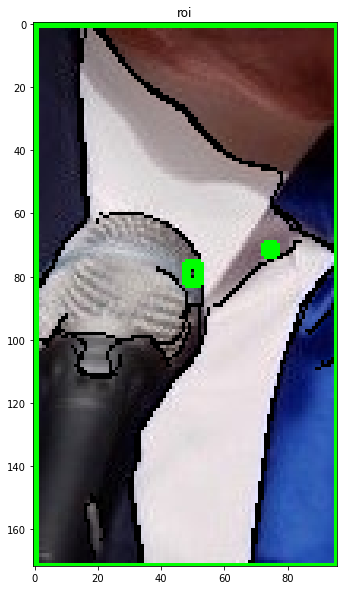

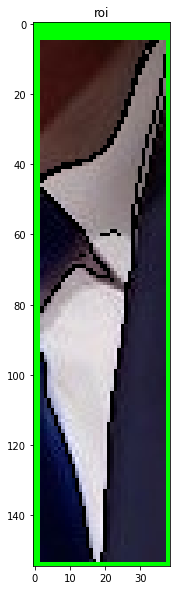

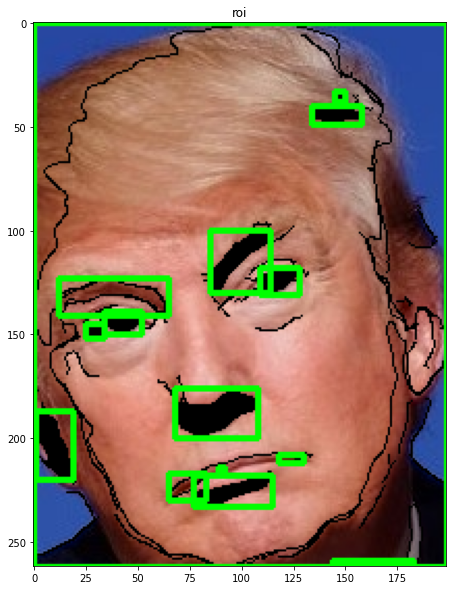

In [ ]:
#printing roi (region of interest) which are having more than the mean of the contours
for i in range(len(contours)):
    x,y,w,h=cv2.boundingRect(contours[i])
    roi=image[y:y+h,x:x+w]
    if(roi.mean() < len(roi)):
      imshow("roi",roi)
    

## **Thank You**